### CESSの結果に対して階層的クラスタリングを行う
---
#### [Method]
#### 好きな方法でクラスタリングをする

In [1]:
# Import Library
import os
from typing import NamedTuple, List, Dict, Tuple, Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Set Config
class ScriptConfig(NamedTuple):
    data1: str = "./analysis2021june/pca_data_1.pkl"
    data2: str = "./analysis2021june/pca_data_2.pkl"
    container: str = "./analysis2021june"
    kwarg_dendrogram: Dict[str,Any] = {
        "detail" : [("euclidean", "ward"), ("cosine", "single")],
        "title" : ["Euclidean Distance", "Cosine Similarity"]
    }   
    kwarg_savefig: Dict = {
        "facecolor": "white",
        "dpi": 300,
        "bbox_inches": "tight",
        "pad_inches": 0.05
    }
    save_file: bool = False
        
config = ScriptConfig(save_file = True)

In [3]:
# Set dir to save files
os.makedirs(config.container, exist_ok=True)

In [4]:
#Load Data
data1_raw = pd.read_pickle(config.data1)
data1_raw.index.name = 1
data2_raw = pd.read_pickle(config.data2)
data2_raw.index.name = 2
df = [data1_raw, data2_raw]

In [5]:
# Define Original Function
def select(i, kwarg):
    metric, method = kwarg["detail"][i]
    title = kwarg["title"][i]
    return {"metric":metric, "method":method, "title":title}

def plot_dendro(dataframe, x, title):
    fig = plt.figure(figsize=(4, 4))
    dendrogram(x, labels=dataframe.index)
    plt.title(title, size=10)
    plt.xlabel('Sample', size=10)
    plt.ylabel('Threshold', size=10)
    plt.tick_params(labelsize=10, rotation=90)
    return None

def whole_process(dataframe, kwarg):
    n_data = len(kwarg["detail"])
    for i in range(n_data):
        select(i, kwarg)
        arg = select(i, kwarg)
        x = linkage(dataframe, metric=arg["metric"], method=arg["method"])
        plot_dendro(dataframe, x, arg["title"])
        plt.savefig(f"{config.container}/cluster_{arg['metric']}_{dataframe.index.name}.png", **config.kwarg_savefig)
    return "Process compleated"   

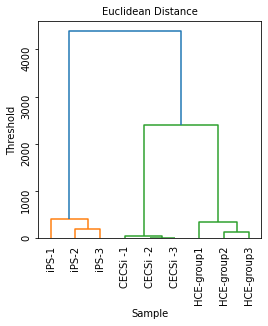

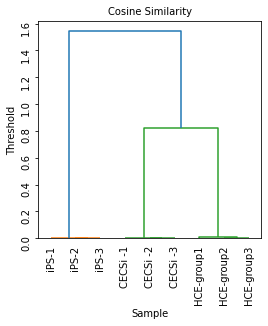

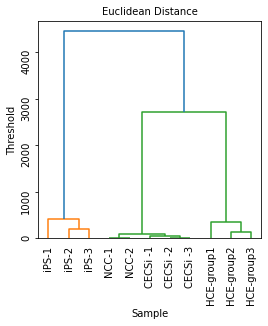

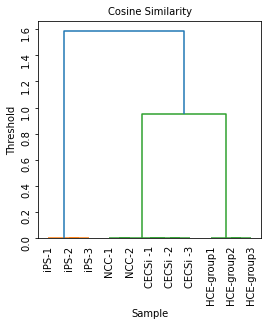

In [6]:
for i, v in enumerate(df):
    whole_process(v, config.kwarg_dendrogram)